# Multi-Class Prediction of Obesity Risk
### Kaggle Competition

column max_columns daisplay [fix](https://github.com/jupyterlab/jupyterlab/issues/14625#issuecomment-1722137537) for Firefox

Firstly, we work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

#### Packages and Libraries:
 * Plotly

## Data Preprocessing
Firstly, we'll work with the [original](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster) dataset

In [42]:
import pandas as pd
from IPython.display import display, HTML
pd.set_option('display.max_columns', 85)
pd.option_context("display.max_rows", 10, "display.max_columns", 18)
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>")) # column width display fix for Firefox

df = pd.read_csv('data/ObesityDataSet.csv') # Original dataset 

pd.options.display.max_columns = None
print(df.shape)
df.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
df.NObeyesdad.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


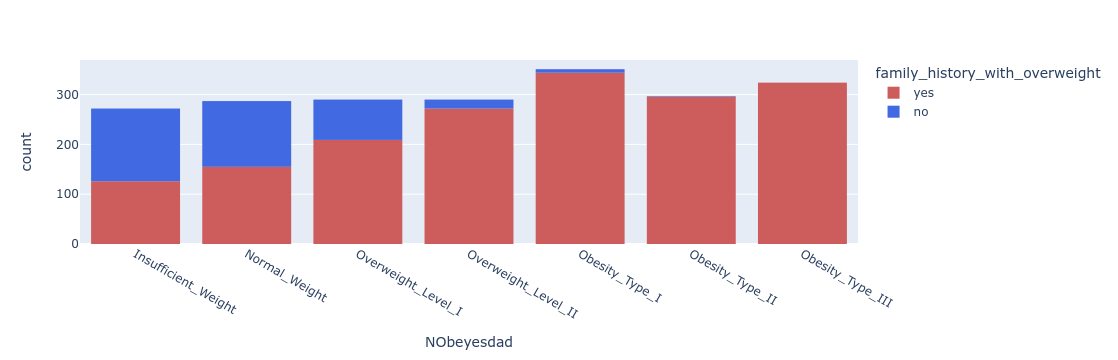

In [44]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import plotly.express as px
color_map = {'yes': 'indianred', 'no': 'royalblue'}

obesity_list = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

print(df.NObeyesdad.unique())
px.histogram(df, x='NObeyesdad', color='family_history_with_overweight', 
             category_orders={'NObeyesdad': obesity_list}, color_discrete_map=color_map) # .update_xaxes(categoryorder='total ascending')

*NObeyesdad* column will serve as our *target attribute*, also known as ***ground truth***

As we may observe from the histogram, the distribution of weight categories is approximately equal. 
Additionally, we may note the impact of genetics on the occurrence of obesity. 
Among participants categorised as "Insufficient Weight", "Normal Weight" and "Overweight Level I" a significant number have no family history of obesity. This suggests a correlation between genetic predisposition and obesity occurrence. Interestingly, the more severe the overweight category, the fewer people report family history with overweight.

We will create heatmaps in order to perform a more thorough examination of the influence of specific features on obesity.

For that reason we ought to convert non-numerical entries into numbers

# Clean the data

------------------- columns with strs -------------------

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


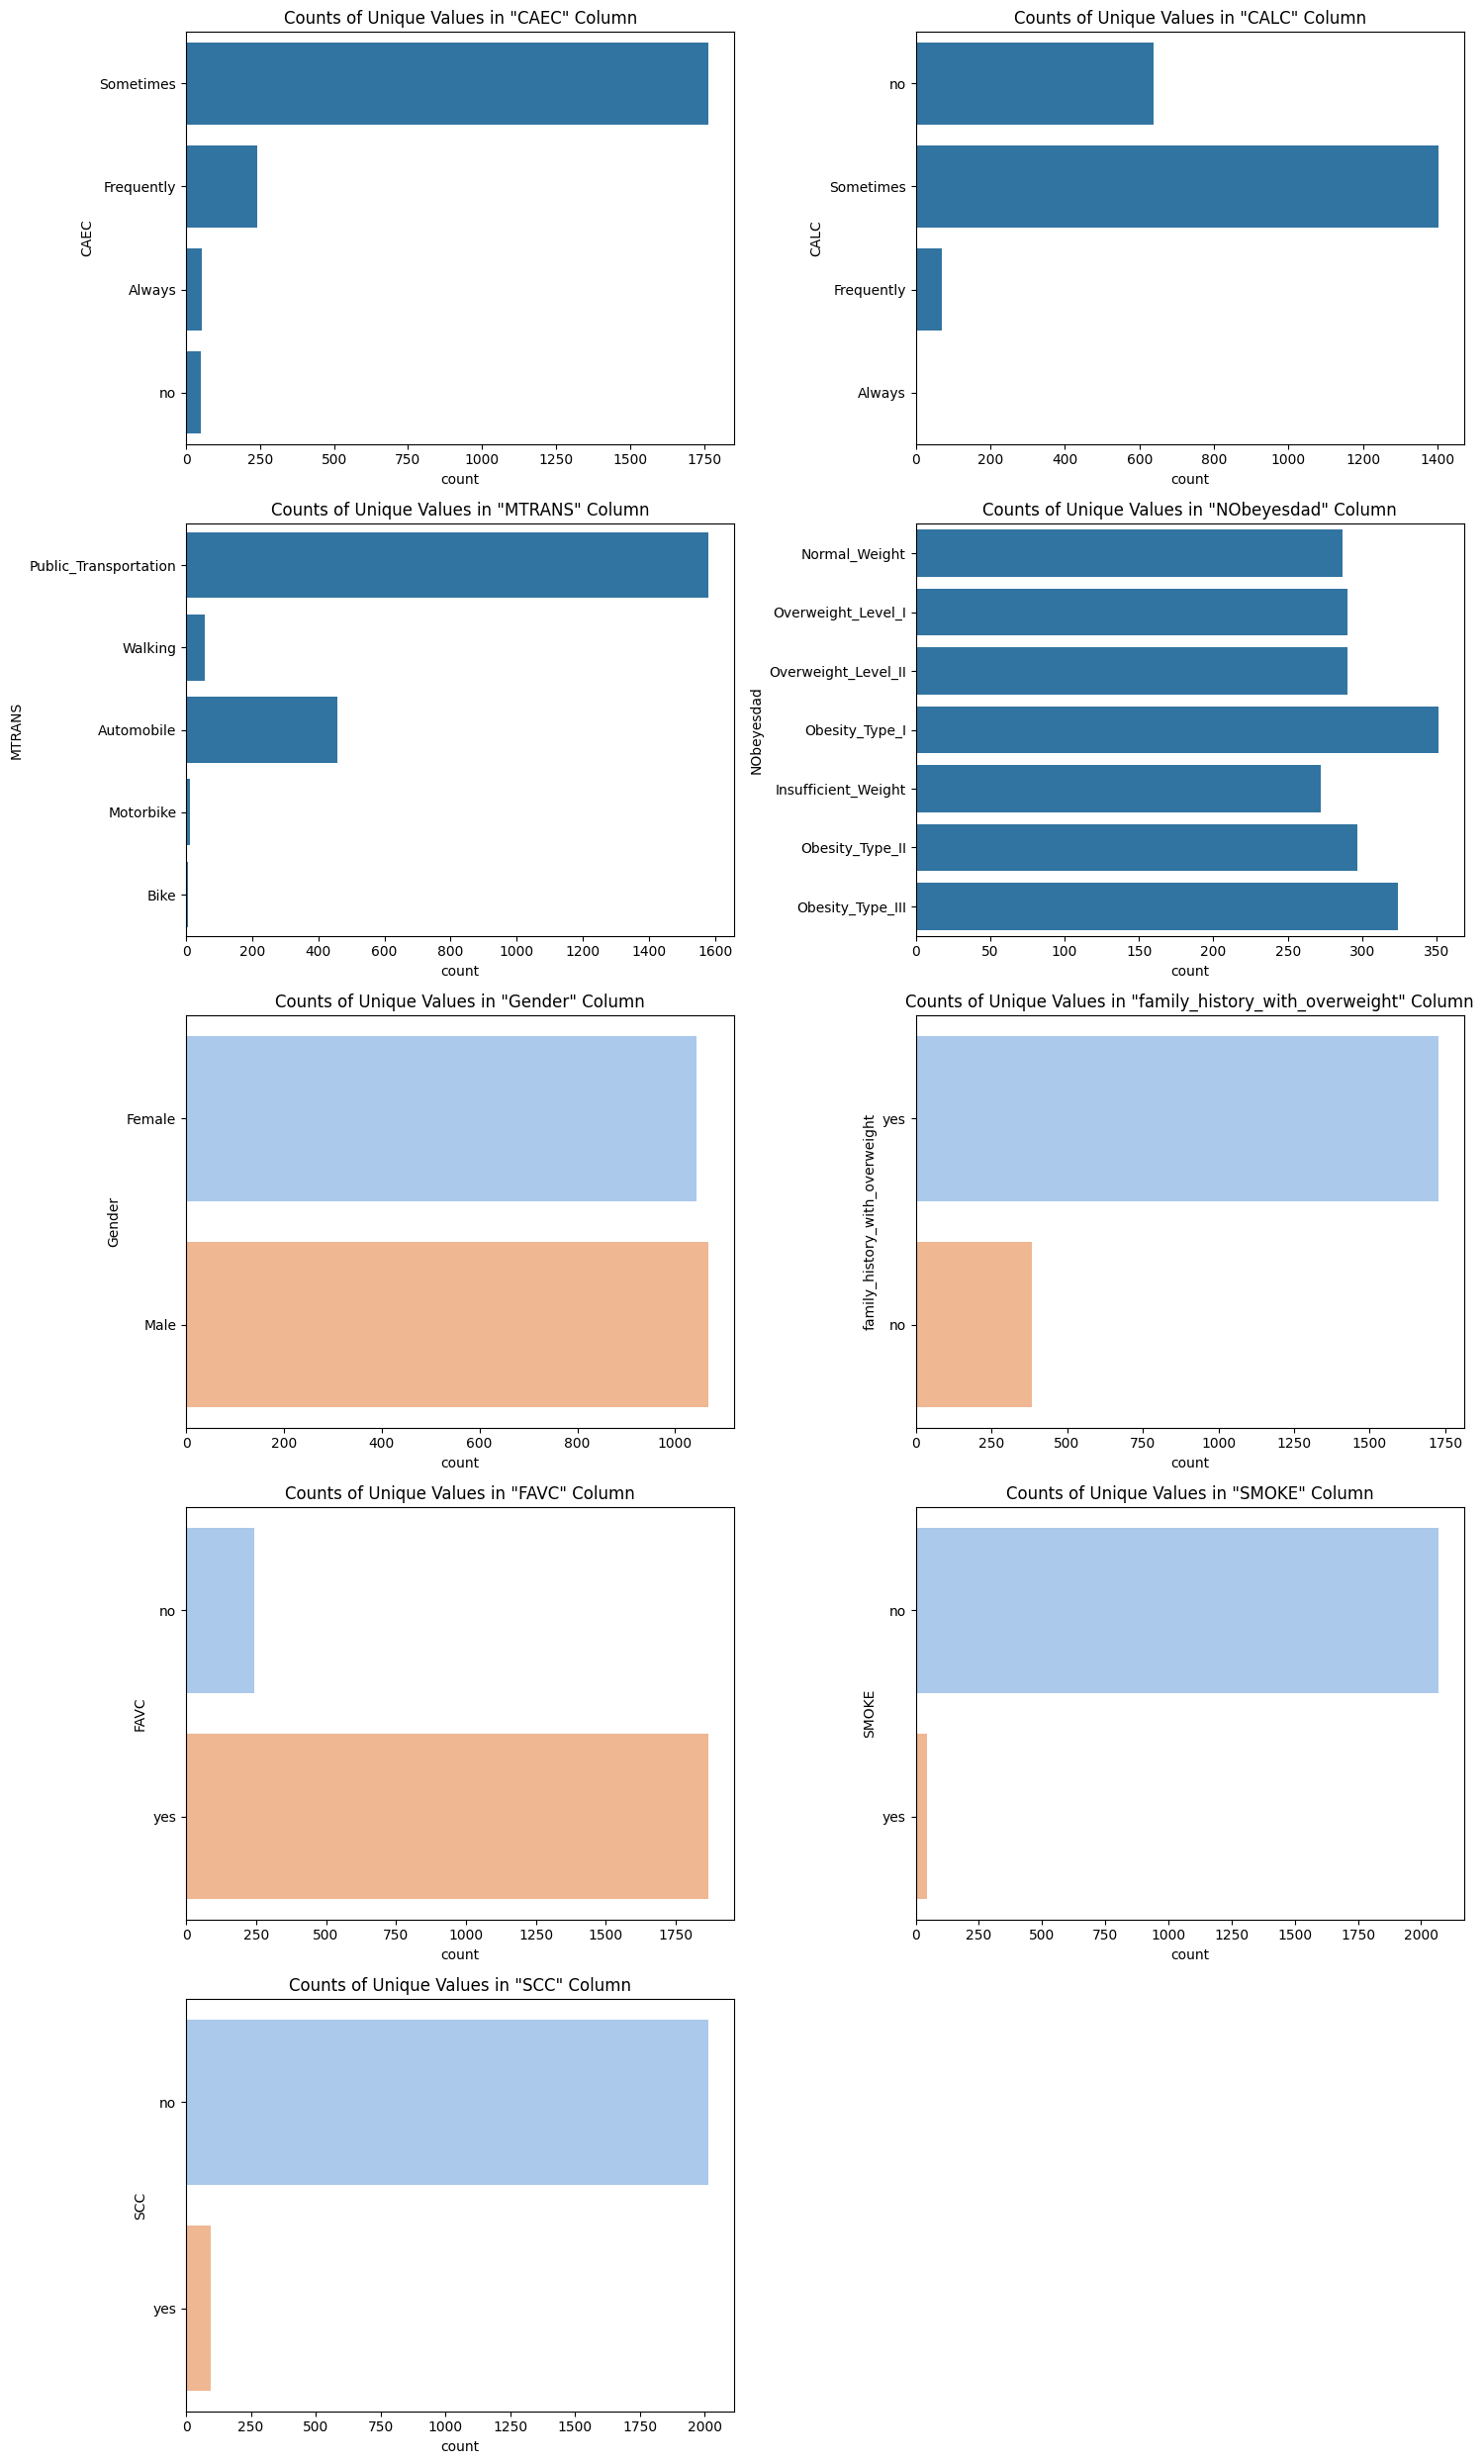

In [45]:
string_columns = df.select_dtypes(include='object').columns
str_cols = string_columns

if len(str_cols) == 0:
  print("There are not string columns")
  raise SystemExit   # Exit the program
print("------------------- columns with strs -------------------\n")
print(str_cols)

# Filter string columns based on the number of unique values
more_than_two_unique = [col for col in string_columns if df[col].nunique() > 2]
two_unique = [col for col in string_columns if df[col].nunique() == 2]

# Set up the figure and axis for the subplots
n_cols = 2
n_rows = (len(more_than_two_unique) + len(two_unique) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Iterate through the string columns with more than two unique values and create a bar plot for each
for idx, col in enumerate(more_than_two_unique):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax)  # Use 'y' parameter for horizontal bars
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Iterate through the string columns with exactly two unique values and create a bar plot for each
for idx, col in enumerate(two_unique, start=len(more_than_two_unique)):
    ax = axes[idx // n_cols, idx % n_cols]
    sb.countplot(data=df, y=col, ax=ax, palette="pastel")  # Use a different color palette
    ax.set_title(f'Counts of Unique Values in "{col}" Column')

# Remove empty subplots
for idx in range(len(more_than_two_unique) + len(two_unique), n_rows * n_cols):
    fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()


#### Convert to numerical representation

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [41]:
string_columns = []
for i in list(df.columns):
    if df[i].dtype != 'float64' and df[i].dtype != 'int64':
        # print(f"{i}: {df[i].unique()}")
        string_columns.append(i)
string_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

We could use scikit-learn's LabelEncoder.
~~~~
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in string_columns:
    df[col] = le.fit_transform(df[col])

print(df.head())

~~~~
However, as mentioned [here](https://github.com/AlexanderNixon/Machine-learning-reads/blob/master/How-to-encode-ordinal-features.ipynb) LabelEncoder does not assign numbers based on the semantic meaning of these words, but simply assigns values based on the alphabetical or lexicographical order of the categories it encounters. This can lead to misinterpretations, especially in the case of ordinal data where the order of categories carries meaningful information. The better and more appropriate approach would be to assign numbers to categories based on the meaning, i.e


Insufficient_Weight - 0, Normal_Weight - 1, ... , Obesity_Type_III - 6



In [40]:
weight_category_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df['NObeyesdad'] = df['NObeyesdad'].map(weight_category_order)


------------------- columns with floats -------------------

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
-----------------------------------------------------------

['Gender', 'Age', 'Height', 'Weight']
['FAVC', 'FCVC', 'NCP', 'CAEC']
['CH2O', 'SCC', 'FAF', 'TUE']
['MTRANS', 'NObeyesdad']


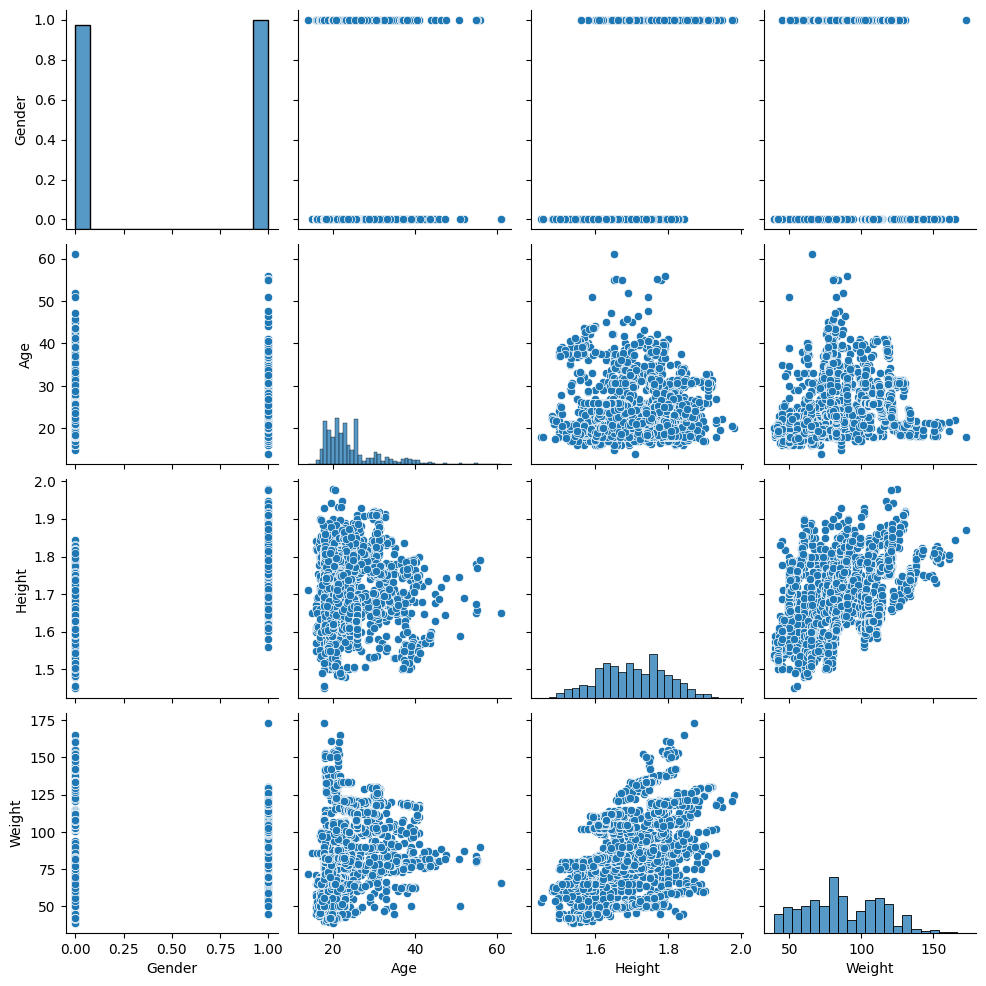

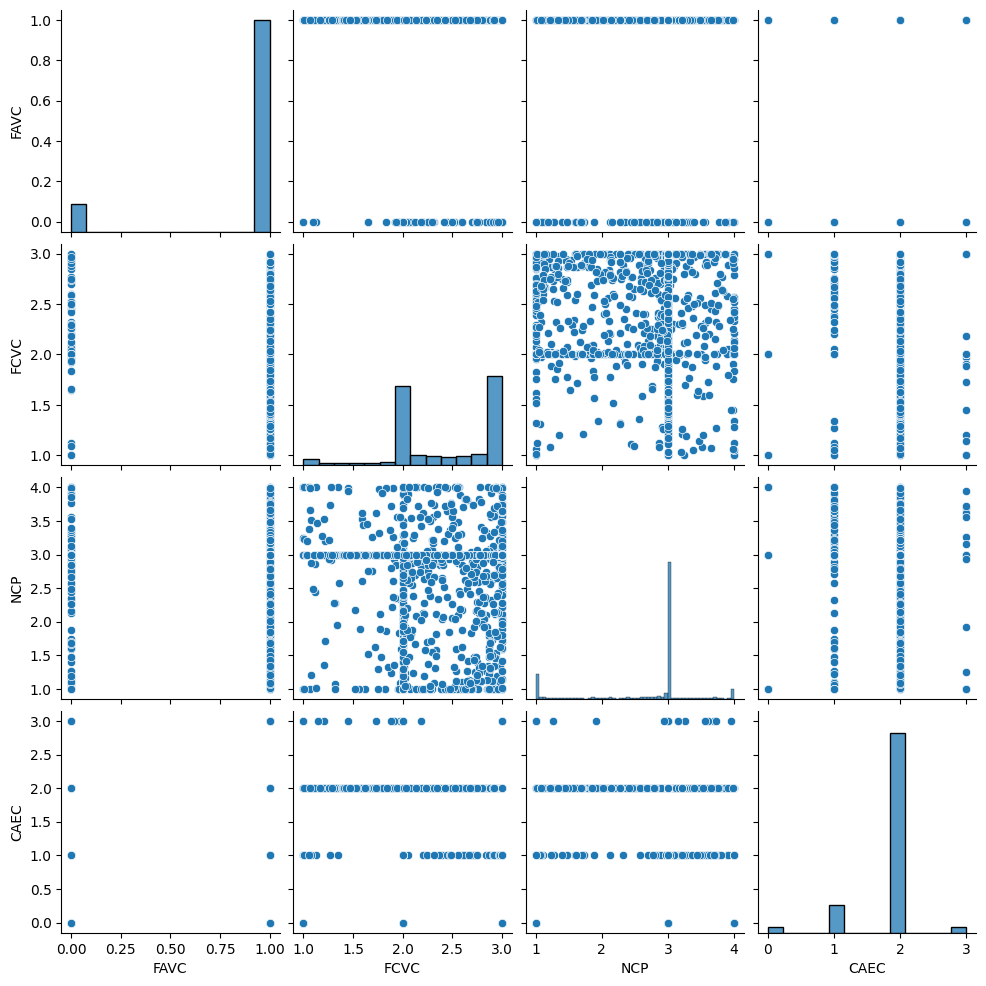

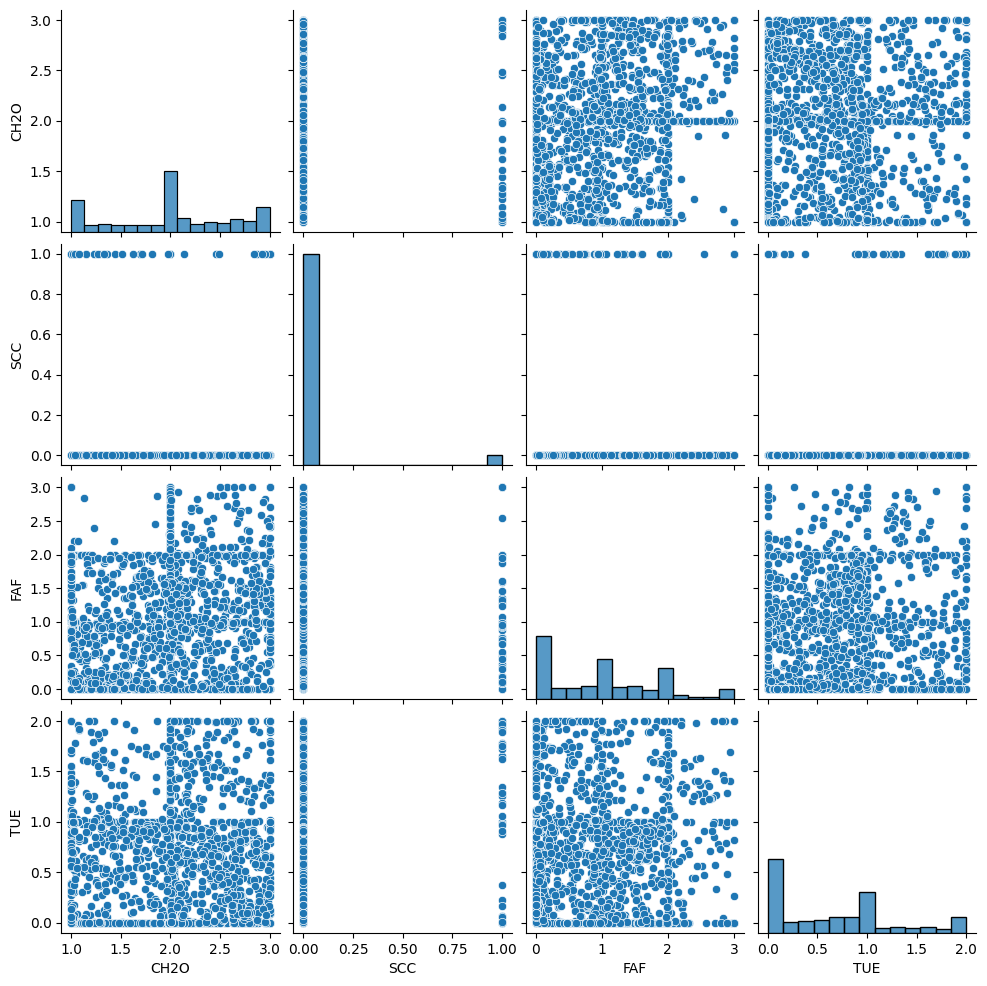

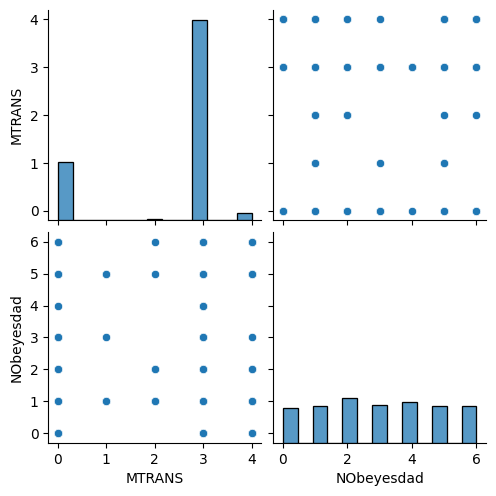

In [28]:
import seaborn as sb
# select integer columns
float_cols = list(df.select_dtypes(include=['int', 'float']).columns)
sublist = [float_cols[i:i+4] for i in range(0, len(float_cols), 5)]
print("------------------- columns with floats -------------------\n")
print(float_cols)
print("-----------------------------------------------------------\n")
for sub in sublist:
  print(f"{sub}")
  sb.pairplot(df[sub].dropna())

In [29]:
minors = df[df.Age > 50]
print(minors)

      Gender        Age    Height     Weight  family_history_with_overweight  \
21         0  52.000000  1.690000  87.000000                               1   
92         1  55.000000  1.780000  84.000000                               1   
133        0  61.000000  1.650000  66.000000                               0   
161        1  55.000000  1.650000  80.000000                               0   
232        0  51.000000  1.590000  50.000000                               1   
252        1  56.000000  1.790000  90.000000                               1   
1013       1  55.246250  1.769269  80.491339                               0   
1034       1  50.832559  1.745528  82.130728                               1   
1088       1  55.137881  1.657221  80.993213                               1   
1158       1  55.022494  1.673394  80.400306                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF  TUE  CALC  \
21       1   3.0  1.0     2      1  2.000000 

In [35]:
# drinking_map = {"no": 0, "sometimes": 1, "frequently": 2, "always": 3}
# df['CAEC'] = df['CAEC'].str.strip().str.lower().map(drinking_map)

# redefined - to be removed
obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 
              'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6} 
df['NObeyesdad'] = df['NObeyesdad'].str.strip().map(obesity_map)
# drink_no = df[df.CAEC.str.strip().str.lower() == 'no'] # 0
# drink_some = df[df.CAEC.str.strip().str.lower() == 'sometimes'] # 1
# drink_freq = df[df.CAEC.str.strip().str.lower() == 'frequently'] # 2
# drink_always = df[df.CAEC.str.strip().str.lower() == 'always'] # 3

# print(len(drink_no))
# print(len(drink_always))
# print(len(drink_freq))
# print(len(drink_some))


In [30]:
df.NObeyesdad

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int64

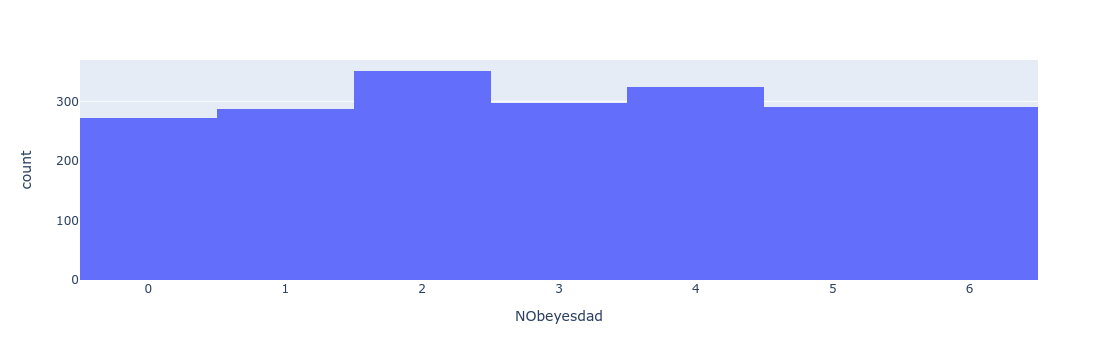

In [15]:
px.histogram(df, x='NObeyesdad')

In [16]:
df.CAEC.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: CAEC
Non-Null Count  Dtype
--------------  -----
2111 non-null   int64
dtypes: int64(1)
memory usage: 16.6 KB


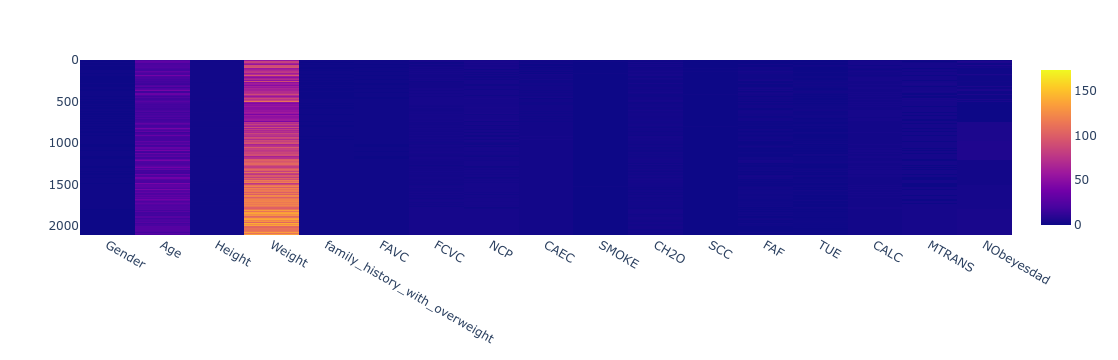

In [17]:
tefig = px.imshow(df)
tefig

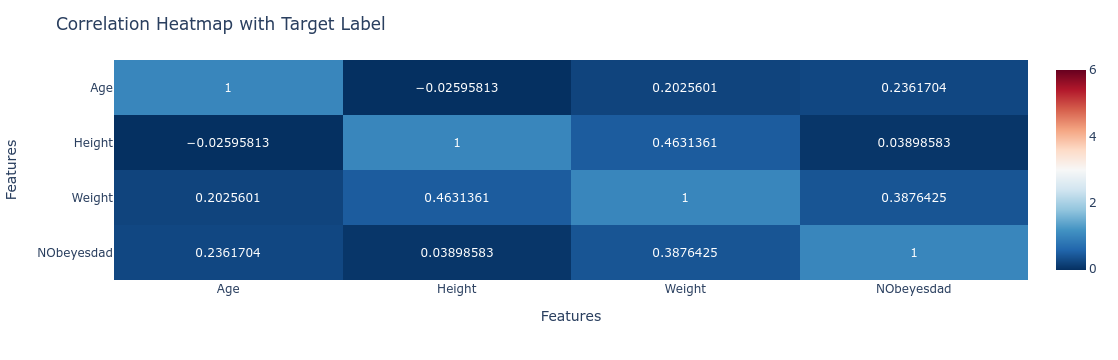

In [19]:
import pandas as pd
import plotly.express as px

# Selecting columns including the numeric target label
selected_columns = ['Age', 'Height', 'Weight', 'NObeyesdad']
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating the heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values on the heatmap
                aspect="auto",  # Adjust aspect ratio
                zmax=6,
                color_continuous_scale='RdBu_r')  # Color scale for visualization

# Updating layout for better readability
fig.update_layout(
    title='Correlation Heatmap with Target Label',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis = dict(tickmode = 'array', tickvals = list(range(len(df_selected.columns))), ticktext = df_selected.columns),
    yaxis = dict(tickmode = 'array', tickvals = list(range(len(df_selected.columns))), ticktext = df_selected.columns)
)

fig.show()

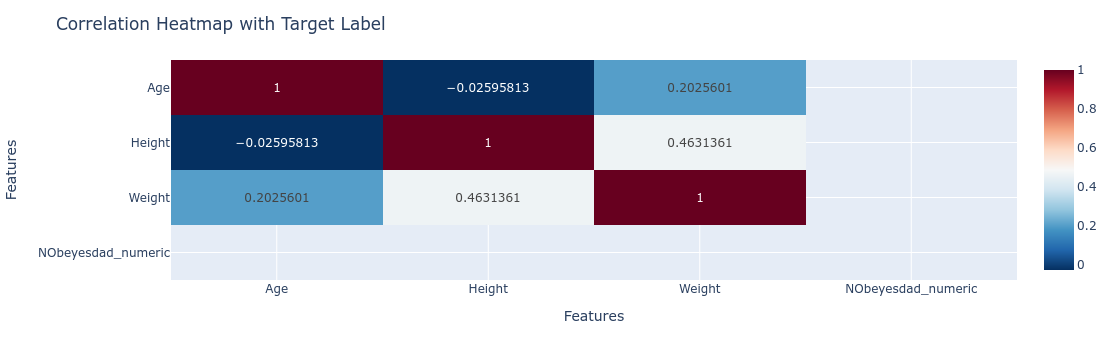

In [20]:
import pandas as pd
import plotly.express as px

# Mapping the target label to numerical values
obesity_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
               'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df['NObeyesdad_numeric'] = df['NObeyesdad'].map(obesity_map)

# Selecting columns including the numeric target label
selected_columns = ['Age', 'Height', 'Weight', 'NObeyesdad_numeric']
df_selected = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = df_selected.corr()

# Creating the heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values on the heatmap
                aspect="auto",  # Adjust aspect ratio
                color_continuous_scale='RdBu_r')  # Color scale for visualization

# Updating layout for better readability
fig.update_layout(
    title='Correlation Heatmap with Target Label',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickmode='array', tickvals=list(range(len(df_selected.columns))), ticktext=df_selected.columns),
    yaxis=dict(tickmode='array', tickvals=list(range(len(df_selected.columns))), ticktext=df_selected.columns)
)

fig.show()


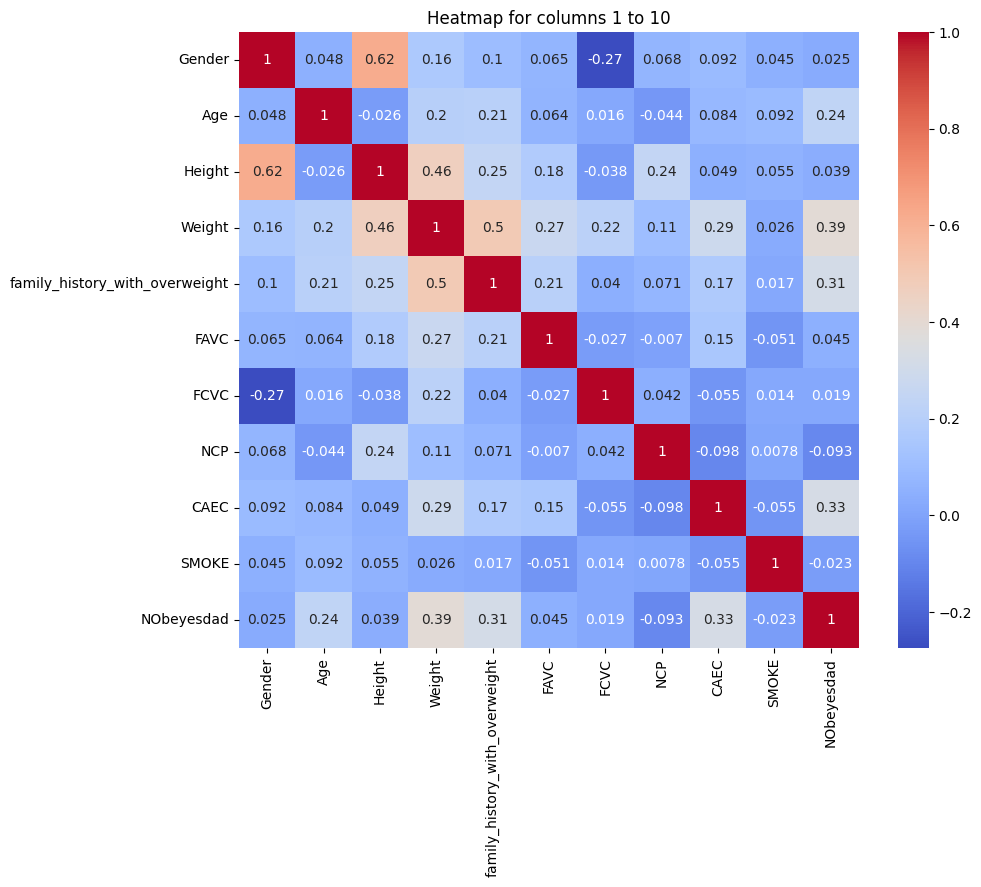

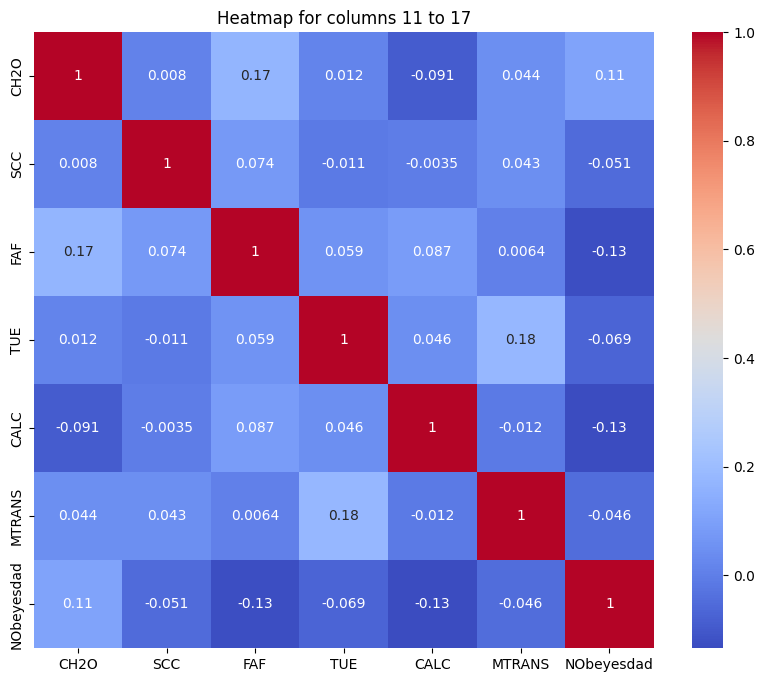

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and it's already loaded and preprocessed
# Ensure that 'NObeyesdad' is mapped to numerical values as needed

# Number of columns in df
num_cols = len(df.columns)

# Make sure 'NObeyesdad' column is in the dataframe
if 'NObeyesdad' not in df.columns:
    print("The 'NObeyesdad' column does not exist in the dataframe.")



# Loop over each set of 10 columns
for i in range(0, num_cols, 10):
    # Select columns
    if i + 10 < num_cols:
        cols = df.columns[i:i+10]
    else:
        # In case there are fewer than 10 columns left in the last iteration
        cols = df.columns[i:]

    # Always include 'NObeyesdad' column
    if 'NObeyesdad' not in cols:
        cols = cols.insert(len(cols), 'NObeyesdad')

    # Compute correlation and create heatmap
    corr = df[cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {min(i+10, num_cols)}")
    plt.show()
